# Imaging
Run the following hidden cells for preparing the code environment

In [1]:
%pylab inline
import pandas
from tqdm.notebook import tqdm
import h5py
import os
import pandas

Populating the interactive namespace from numpy and matplotlib


Import the BrightEyes-TTM library (`libttp`)

In [2]:
import libttp.ttp as ttp


# Select Data & parameters

In [3]:
filenameToRead="/home/YOURFILE.ttr"


In [4]:
CHANNELS=25                              # Number of CHANNELS
sysclk_MHz=240.                          # FPGA system clock (MHz)
npixel = 512                             # Image size (pixels)
laser_MHz=80.                            # Laser repetition rate (MHz)
laser_factor=1                           # Adimensional number to account for laser actual repetiton frequency (default = 1)
dwell_time = 50                          # Pixel dwell time (us)
list_of_channels = np.arange(0,CHANNELS) # List of channels to analyse (it must be a numpy.array)
kC4=48                                   # Time width of TCSPC histogram bin in [ps] (default = 48ps)

#### Define the output HDF5 filename 

In [5]:
filenameHDF5=filenameToRead+".h5"

## Read the Raw file (protocol v2.0) and create the dataframe

In [6]:
df = ttp.readNewProtocolFileToPandas(
    filenameIn=filenameToRead,
    reorder_channels=True, #needed for 25 channel otherwise the channel will not respect the order
    CHANNELS=CHANNELS,
    force_16bit_step=True)

0 -1
File total size in uint16 units: 173986958
-1
File read size in uint16 units: 173986958
Channels: 25
MAXWORD: 30
34518482
data read
i) added column
ii) added pixel, line, frame
iii) added 'steps' bytes
         assume step 16-bit long
iv) calculate 'step'
Index(['id_0', 'id_1', 'id_2', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8',
       'id_9', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
       'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'valid_tdc_0',
       'valid_tdc_1', 'valid_tdc_2', 'valid_tdc_3', 'valid_tdc_4',
       'valid_tdc_5', 'valid_tdc_6', 'valid_tdc_7', 'valid_tdc_8',
       'valid_tdc_9', 'valid_tdc_10', 'valid_tdc_11', 'valid_tdc_12',
       'valid_tdc_13', 'valid_tdc_14', 'valid_tdc_15', 'valid_tdc_16',
       'valid_tdc_17', 'valid_tdc_18', 'valid_tdc_19', 'valid_tdc_20',
       'valid_tdc_21', 'valid_tdc_22', 'valid_tdc_23', 'valid_tdc_24',
       'valid_dummy

#### Check if any `valid_laser` signals is present

In [7]:
count_L=count_nonzero(df["valid_tdc_L"])
if count_L==0:
    print("No valid_tdc_L found. Check your Laser SYNC.")
else:
    print("valid_tdc_L", count_L)

valid_tdc_L 17370453


#### A quick preview of the total counts on each channel

[[ 505912.  996376.  660697.  503162.  334467.]
 [ 715801. 1232691. 1006024.  856701.  722346.]
 [ 894372. 1346107. 1093663.  730457.  545522.]
 [ 697805.  917356.  886462.  585033.  529437.]
 [ 673679.  607084.  560464.  459148.  348063.]]


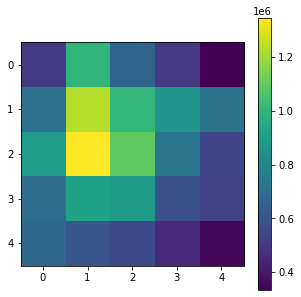

In [8]:
valids=np.zeros(CHANNELS)
for i in range(0,CHANNELS):
    valids[i]=count_nonzero(df["valid_tdc_%d"%i])
if CHANNELS==25:
    figure(figsize(5,5))
    valids=asarray(valids).reshape((5,5))
    imshow(valids)
    colorbar()
elif CHANNELS==49:
    figure(figsize(5,5))
    valids=asarray(valids).reshape((7,7))
    imshow(valids)
    colorbar()

print(valids)


#### Set some useful calculate some useful parameter

In [9]:
laser_MHz=laser_MHz*laser_factor
laser_Hz=laser_MHz*10**6
max_counter=2**16-1
sysclk_ps=1000000./sysclk_MHz #ps
print("SysClk ps:", sysclk_ps)
laser_ps=1000000./laser_MHz #ps
print("LaserClk ps:", laser_ps)
ratio=sysclk_MHz/laser_MHz
sysclk_ps=1e6/sysclk_MHz
laser_ps=1e6/laser_MHz
nbins=int(round(laser_ps/kC4))
print("actual kC4", laser_ps/nbins)

SysClk ps: 4166.666666666667
LaserClk ps: 12500.0
actual kC4 48.07692307692308


# Data frame conversion to H5 format

In [10]:
myReturn=ttp.convertFromPandasDataFrame( df, filenameOutputHDF5=filenameHDF5 ,
                    sysclk_MHz = sysclk_MHz,
                    laser_MHz = laser_MHz,
                    list_of_channels=list_of_channels,
                    compressionLevel=0,
                    ignorePixelLineFrame = False,
                    coincidence_analysis = False,
                    kC4=kC4
                        )

Calculate rates 
Calculate cumulative step 
Add cumulativeStep
Acquisition lasted:  162.6445818375 s
Scan_enable 41.0 ratio 1.187769531341776e-06 rate 0.25208340503444226
line_enable 7640.0 ratio 0.0002213307126695407 rate 46.97359059666192
pixel_enable 1000000.0 ratio 0.02896998856931161 rate 6148.375732547372
Laser 17370453.0 ratio 0.5032218248537645 rate 106800.07168855469
Calculate totalphotons 
start the sum
sum done
kC4<=== 48
sysclk_ps<=== 4166.666666666667
kC4<=== 47.89272030651341
Start process
Start analysisForImg
Arrays copied into analysisForImg


Current frame: 1 	: : 34863584it [00:09, 3493504.82it/s]                        


Total Frame: 1
New HDF5 written
total_photon        uint8
cumulative_step     int64
arr_px             uint16
arr_px_corr        uint16
arr_py             uint16
arr_frame          uint16
dtype: object


  0%|                                                    | 0/25 [00:00<?, ?it/s]

Start conversion of 0 channel
t_0 valid_tdc_0
..
...



 26%|██████▊                   | 4620408/17770824 [00:00<00:00, 44738752.07it/s]

starting loop



 54%|██████████████            | 9596232/17770824 [00:00<00:00, 46032619.79it/s]
17948508it [00:00, 43700831.10it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_0"


  4%|█▊                                          | 1/25 [00:06<02:41,  6.75s/it]

t_0      int16
t_L      int16
dS_0    uint16
dtype: object
Start conversion of 1 channel
t_1 valid_tdc_1
..
...



 18%|████▋                     | 3259044/18105815 [00:00<00:00, 31855136.39it/s]

starting loop



 72%|█████████████████▉       | 13036176/18105815 [00:00<00:00, 29900415.90it/s]
18286858it [00:00, 29751140.45it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_1"


  8%|███▌                                        | 2/25 [00:13<02:40,  6.99s/it]

t_1      int16
t_L      int16
dS_1    uint16
dtype: object
Start conversion of 2 channel
t_2 valid_tdc_2
..
...



 27%|███████                   | 4833270/17901091 [00:00<00:00, 46533448.32it/s]

starting loop



 53%|█████████████▊            | 9487530/17901091 [00:00<00:00, 44643063.81it/s]
18080010it [00:00, 45533292.82it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_2"


 12%|█████▎                                      | 3/25 [00:20<02:30,  6.85s/it]

t_2      int16
t_L      int16
dS_2    uint16
dtype: object
Start conversion of 3 channel
t_3 valid_tdc_3
..
...



 25%|██████▍                   | 4438550/17754250 [00:00<00:00, 43562137.64it/s]

starting loop



 51%|█████████████▎            | 9054642/17754250 [00:00<00:00, 44770089.64it/s]
17931742it [00:00, 43120754.68it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_3"


 16%|███████                                     | 4/25 [00:27<02:22,  6.78s/it]

t_3      int16
t_L      int16
dS_3    uint16
dtype: object
Start conversion of 4 channel
t_4 valid_tdc_4
..
...



 27%|███████                   | 4764069/17644727 [00:00<00:00, 47208416.51it/s]

starting loop



 59%|██████████████▋          | 10410373/17644727 [00:00<00:00, 51847572.93it/s]
17821147it [00:00, 53586371.54it/s]                                             
 20%|████████▊                                   | 5/25 [00:33<02:12,  6.62s/it]

Data ready, conversion to array
Adding keys to HDF5...  "ch_4"
t_4      int16
t_L      int16
dS_4    uint16
dtype: object
Start conversion of 5 channel
t_5 valid_tdc_5
..
...



 23%|█████▉                    | 4117897/17903909 [00:00<00:00, 40540308.28it/s]


starting loop


 71%|█████████████████▋       | 12711769/17903909 [00:00<00:00, 42088650.79it/s]
18082939it [00:00, 39992777.86it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_5"


 24%|██████████▌                                 | 6/25 [00:40<02:06,  6.64s/it]

t_5      int16
t_L      int16
dS_5    uint16
dtype: object
Start conversion of 6 channel
t_6 valid_tdc_6
..
...



 17%|████▍                     | 3113193/18312930 [00:00<00:00, 30794303.82it/s]

starting loop



 73%|██████████████████▏      | 13368417/18312930 [00:00<00:00, 31429448.80it/s]
18496029it [00:00, 32495009.56it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_6"


 28%|████████████▎                               | 7/25 [00:47<02:02,  6.78s/it]

t_6      int16
t_L      int16
dS_6    uint16
dtype: object
Start conversion of 7 channel
t_7 valid_tdc_7
..
...



 23%|█████▉                    | 4159366/18084239 [00:00<00:00, 40067075.59it/s]

starting loop



 68%|████████████████▉        | 12297256/18084239 [00:00<00:00, 38129273.83it/s]
18265042it [00:00, 36476581.93it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_7"


 32%|██████████████                              | 8/25 [00:54<01:56,  6.84s/it]

t_7      int16
t_L      int16
dS_7    uint16
dtype: object
Start conversion of 8 channel
t_8 valid_tdc_8
..
...



 24%|██████▏                   | 4328496/18035410 [00:00<00:00, 43094306.69it/s]

starting loop



 72%|█████████████████▉       | 12985488/18035410 [00:00<00:00, 40544107.29it/s]
18215754it [00:00, 41112416.24it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_8"


 36%|███████████████▊                            | 9/25 [01:01<01:49,  6.82s/it]

t_8      int16
t_L      int16
dS_8    uint16
dtype: object
Start conversion of 9 channel
t_9 valid_tdc_9
..
...



 27%|███████                   | 4833864/17903227 [00:00<00:00, 47029489.52it/s]

starting loop



 54%|██████████████            | 9667728/17903227 [00:00<00:00, 41665022.67it/s]
18082232it [00:00, 40186310.49it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_9"


 40%|█████████████████▏                         | 10/25 [01:07<01:41,  6.77s/it]

t_9      int16
t_L      int16
dS_9    uint16
dtype: object
Start conversion of 10 channel
t_10 valid_tdc_10
..
...



 16%|████▏                     | 2896928/18105894 [00:00<00:00, 27972403.52it/s]

starting loop



 77%|███████████████████▏     | 13941466/18105894 [00:00<00:00, 32414556.50it/s]
18286858it [00:00, 33777311.90it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_10"


 44%|██████████████████▉                        | 11/25 [01:14<01:35,  6.80s/it]

t_10      int16
t_L       int16
dS_10    uint16
dtype: object
Start conversion of 11 channel
t_11 valid_tdc_11
..
...



 21%|█████▍                    | 3856125/18362574 [00:00<00:00, 36991170.64it/s]

starting loop



 76%|██████████████████▉      | 13955500/18362574 [00:00<00:00, 27783187.22it/s]
18546125it [00:00, 28223704.68it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_11"


 48%|████████████████████▋                      | 12/25 [01:21<01:30,  6.96s/it]

t_11      int16
t_L       int16
dS_11    uint16
dtype: object
Start conversion of 12 channel
t_12 valid_tdc_12
..
...



 19%|████▉                     | 3436796/18088447 [00:00<00:00, 33563221.26it/s]

starting loop



 79%|███████████████████▋     | 14289836/18088447 [00:00<00:00, 34629410.97it/s]
18269284it [00:00, 34790303.62it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_12"


 52%|██████████████████████▎                    | 13/25 [01:28<01:22,  6.92s/it]

t_12      int16
t_L       int16
dS_12    uint16
dtype: object
Start conversion of 13 channel
t_13 valid_tdc_13
..
...



 18%|████▋                     | 3227796/17932241 [00:00<00:00, 31036757.28it/s]

starting loop



 79%|███████████████████▋     | 14166438/17932241 [00:00<00:00, 33222320.82it/s]
18111522it [00:00, 33059105.48it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_13"


 56%|████████████████████████                   | 14/25 [01:35<01:15,  6.91s/it]

t_13      int16
t_L       int16
dS_13    uint16
dtype: object
Start conversion of 14 channel
t_14 valid_tdc_14
..
...



 26%|██████▊                   | 4616456/17755683 [00:00<00:00, 45771200.65it/s]

starting loop



 54%|██████████████            | 9588024/17755683 [00:00<00:00, 47297736.04it/s]
17933156it [00:00, 48539536.17it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_14"


 60%|█████████████████████████▊                 | 15/25 [01:42<01:07,  6.77s/it]

t_14      int16
t_L       int16
dS_14    uint16
dtype: object
Start conversion of 15 channel
t_15 valid_tdc_15
..
...



 21%|█████▍                    | 3759483/17902351 [00:00<00:00, 36661864.54it/s]

starting loop



 65%|████████████████▏        | 11636495/17902351 [00:00<00:00, 37625816.63it/s]
18081323it [00:00, 37292965.98it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_15"


 64%|███████████████████████████▌               | 16/25 [01:48<01:00,  6.72s/it]

t_15      int16
t_L       int16
dS_15    uint16
dtype: object
Start conversion of 16 channel
t_16 valid_tdc_16
..
...



 25%|██████▍                   | 4528650/18114647 [00:00<00:00, 43965472.10it/s]

starting loop



 73%|██████████████████▏      | 13223658/18114647 [00:00<00:00, 35009120.80it/s]
18295746it [00:00, 36801086.81it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_16"


 68%|█████████████████████████████▏             | 17/25 [01:55<00:53,  6.75s/it]

t_16      int16
t_L       int16
dS_16    uint16
dtype: object
Start conversion of 17 channel
t_17 valid_tdc_17
..
...



 25%|██████▍                   | 4522850/18091495 [00:00<00:00, 44086926.86it/s]

starting loop



 73%|██████████████████▏      | 13206722/18091495 [00:00<00:00, 40858403.18it/s]
18272314it [00:00, 39446876.28it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_17"


 72%|██████████████████████████████▉            | 18/25 [02:02<00:47,  6.80s/it]

t_17      int16
t_L       int16
dS_17    uint16
dtype: object
Start conversion of 18 channel
t_18 valid_tdc_18
..
...



 24%|██████▏                   | 4286904/17862119 [00:00<00:00, 41439261.85it/s]

starting loop



 71%|█████████████████▋       | 12682091/17862119 [00:00<00:00, 39411550.17it/s]
18040721it [00:00, 37180025.93it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_18"


 76%|████████████████████████████████▋          | 19/25 [02:09<00:40,  6.76s/it]

t_18      int16
t_L       int16
dS_18    uint16
dtype: object
Start conversion of 19 channel
t_19 valid_tdc_19
..
...



 30%|███████▊                  | 5338380/17794662 [00:00<00:00, 52580655.48it/s]

starting loop



 60%|██████████████▉          | 10676760/17794662 [00:00<00:00, 50310732.61it/s]
17972546it [00:00, 41576047.45it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_19"


 80%|██████████████████████████████████▍        | 20/25 [02:15<00:33,  6.67s/it]

t_19      int16
t_L       int16
dS_19    uint16
dtype: object
Start conversion of 20 channel
t_20 valid_tdc_20
..
...



 22%|█████▋                    | 3933908/17881410 [00:00<00:00, 39322148.51it/s]

starting loop



 72%|█████████████████▉       | 12874608/17881410 [00:00<00:00, 43443640.09it/s]
18060214it [00:00, 42333090.51it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_20"


 84%|████████████████████████████████████       | 21/25 [02:22<00:26,  6.66s/it]

t_20      int16
t_L       int16
dS_20    uint16
dtype: object
Start conversion of 21 channel
t_21 valid_tdc_21
..
...



 29%|███████▌                  | 5182706/17871413 [00:00<00:00, 51034153.33it/s]

starting loop



 58%|██████████████▍          | 10365412/17871413 [00:00<00:00, 48820570.85it/s]
18050114it [00:00, 48372321.41it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_21"


 88%|█████████████████████████████████████▊     | 22/25 [02:28<00:19,  6.63s/it]

t_21      int16
t_L       int16
dS_21    uint16
dtype: object
Start conversion of 22 channel
t_22 valid_tdc_22
..
...



 30%|███████▊                  | 5344350/17814586 [00:00<00:00, 52691426.49it/s]

starting loop



 60%|██████████████▉          | 10688700/17814586 [00:00<00:00, 50070576.98it/s]
17992645it [00:00, 49894133.29it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_22"


 92%|███████████████████████████████████████▌   | 23/25 [02:35<00:13,  6.58s/it]

t_22      int16
t_L       int16
dS_22    uint16
dtype: object
Start conversion of 23 channel
t_23 valid_tdc_23
..
...



 32%|████████▎                 | 5672512/17726663 [00:00<00:00, 55968044.93it/s]

starting loop



 64%|███████████████▉         | 11345024/17726663 [00:00<00:00, 53070411.71it/s]
17903866it [00:00, 45694059.31it/s]                                             


Data ready, conversion to array
Adding keys to HDF5...  "ch_23"


 96%|█████████████████████████████████████████▎ | 24/25 [02:41<00:06,  6.53s/it]

t_23      int16
t_L       int16
dS_23    uint16
dtype: object
Start conversion of 24 channel
t_24 valid_tdc_24
..
...



 29%|███████▌                  | 5080974/17520631 [00:00<00:00, 50060016.10it/s]

starting loop



 58%|██████████████▍          | 10161948/17520631 [00:00<00:00, 41348219.43it/s]
17695806it [00:00, 45036006.12it/s]                                             
100%|███████████████████████████████████████████| 25/25 [02:47<00:00,  6.72s/it]

Data ready, conversion to array
Adding keys to HDF5...  "ch_24"
t_24      int16
t_L       int16
dS_24    uint16
dtype: object
Data saved:  /home/YOURFILE.ttr.h5


## Timing calibration of data

In [11]:
calibDict,list_of_channels_calibrated = ttp.calculateCalibFromH5(filenameH5=myReturn['filenameH5'],   # the HDF5 file input
                                                                 listChannel=list_of_channels,      # list of channel [0,mchannel]
                                                                 return_numeric_channels=True)        # to activate the list_of_channels_calibrated

  0%|                                                    | 0/25 [00:03<?, ?it/s]


ch_L calculated from ch_0


100%|███████████████████████████████████████████| 25/25 [01:22<00:00,  3.28s/it]


In [12]:
table_channels={}
for i in tqdm(list_of_channels_calibrated):
    table_channels[i] = ttp.applyCalibDict(myReturn['filenameH5'],
                        channel=i, 
                        calibDict=calibDict)

  0%|          | 0/25 [00:00<?, ?it/s]

# Creating 4D data matrix x-y-t-ch

In [13]:
image_4d=ttp.image_4d_fast(npixel,nbins,CHANNELS,table_channels, laser_ps)

100%|███████████████████████████████████████████| 25/25 [00:23<00:00,  1.07it/s]


### Create File

In [16]:
h5file = h5py.File(filenameHDF5, 'r+')
try:
    h5file.create_dataset("image_4d", data=image_4d)
except:
    del h5file["image_4d"]
    h5file.create_dataset("image_4d", data=image_4d)
h5file.close()

### Image

In [19]:
image_4d.shape
#x,y, time, ch

(512, 512, 260, 25)

NameError: name 'ch' is not defined

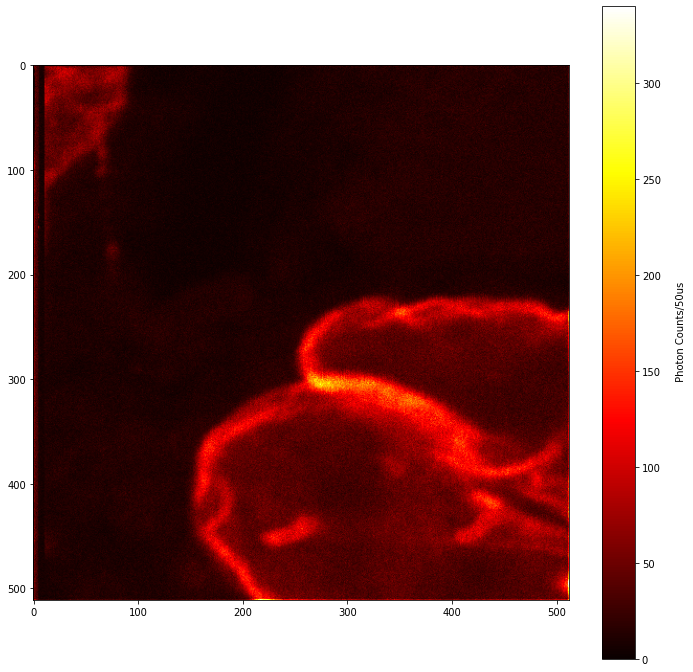

In [18]:
# 3D dataset
data_3d_channel_10=image_4d[:,:,:,:].sum(axis=-1) #sum over all channels
# x-y image
image_channel_10=data_3d_channel_10.sum(axis=2) #sum over all time

fig= plt.figure(figsize=(12,12))
plt.imshow(image_channel_10, cmap='hot')

cbar = plt.colorbar()
cbar.set_label('\n Photon Counts/'+str(dwell_time)+'us')
title('Image from sum of all Channel ' \n')
xlabel('Pixels')
ylabel('Pixels')